# Constructing HEP vectors and analyzing HEP data using Vector

**Henry Schreiner\*, Jim Pivarski\*, and Saransh Chopra<sup>+</sup> (speaker)**

\*: Princeton University </br>
<sup>+</sup>: Cluster Innovation Centre, University of Delhi

**Quick links**:
- GitHub repository (of vector) - https://github.com/scikit-hep/vector
- Vector's documentation - https://vector.readthedocs.io/
- GitHub repository (of this talk) - https://github.com/Saransh-cpp/PyHEP22-Constructing-HEP-vectors-and-analyzing-HEP-data-using-Vector
- Binder (to run the code with us) - https://mybinder.org/v2/gh/Saransh-cpp/PyHEP22-Constructing-HEP-vectors-and-analyzing-HEP-data-using-Vector/HEAD?urlpath=lab/tree/talk.ipynb
- Slido ?

## Table of contents

1. [Introduction](#Introduction)
2. [Goals](#Goals)
3. [Setup](#Setup)
4. [Pure Python Object vectors](#Pure-Python-Object-vectors)
5. [NumPy vectors](#NumPy-vectors)
6. [Awkward vectors](#Awkward-vectors)
7. [Compiling vectors with Numba](#Compiling-vectors-with-Numba)
8. [Uproot, Awkward, and Vector](#Uproot,-Awkward,-and-Vector)
9. [Recent developments](#Recent-developments)
10. [Near future development plans](#Near-future-development-plans)
11. [Stuck somewhere? Reach out!](#Stuck-somewhere?-Reach-out!)

## Introduction

Vector is a Python library for 2D, 3D, and Lorentz vectors, including arrays of vectors, designed to solve common physics problems in a NumPy-like way. Vector currently supports pure Python Object, NumPy, Awkward, and Numba-based (Numba-Object, Numba-Awkward) backends.

Main features of Vector:

- Pure Python with NumPy as its only dependency. This makes it easier to install.
- Vectors may be represented in a variety of coordinate systems: Cartesian, cylindrical, pseudorapidity, and any combination of these with time or proper time for Lorentz vectors. In all, there are 12 coordinate systems: {_x_-_y_ vs _ρ_-_φ_ in the azimuthal plane} × {_z_ vs _θ_ vs _η_ longitudinally} × {_t_ vs _τ_ temporally}.
- Uses names and conventions set by [ROOT](https://root.cern/)'s [TLorentzVector](https://root.cern.ch/doc/master/classTLorentzVector.html) and [Math::LorentzVector](https://root.cern.ch/doc/master/classROOT_1_1Math_1_1LorentzVector.html), as well as [scikit-hep/math](https://github.com/scikit-hep/scikit-hep/tree/master/skhep/math), [uproot-methods TLorentzVector](https://github.com/scikit-hep/uproot3-methods/blob/master/uproot3_methods/classes/TLorentzVector.py), [henryiii/hepvector](https://github.com/henryiii/hepvector), and [coffea.nanoevents.methods.vector](https://coffeateam.github.io/coffea/modules/coffea.nanoevents.methods.vector.html).
- Implemented on a variety of backends:
  - pure Python objects
  - NumPy arrays of vectors (as a [structured array](https://numpy.org/doc/stable/user/basics.rec.html) subclass)
  - [Awkward Arrays](https://awkward-array.org/) of vectors
  - potential for more: CuPy, TensorFlow, Torch, JAX...
- NumPy/Awkward backends also implemented in [Numba](https://numba.pydata.org/) for JIT-compiled calculations on vectors.
- Distinction between geometrical vectors, which have a minimum of attribute and method names, and vectors representing momentum, which have synonyms like `pt` = `rho`, `energy` = `t`, `mass` = `tau`.

## Goals

This talk will focus on introducing Vector and its backends through a data analysis pipeline. The session will build up from pure Python Object based vectors to Awkward based vectors, ending with a demonstration of Numba support. Furthermore, we will discuss the latest developments in the library's API and showcase some recent enhancements.

## Setup

There are two ways to follow along (or run this notebook after the talk) -

1. Locally

    - Clone [this](https://github.com/Saransh-cpp/PyHEP22-Constructing-HEP-vectors-and-analyzing-HEP-data-using-Vector.git) repository -
```bash
git clone https://github.com/Saransh-cpp/PyHEP22-Constructing-HEP-vectors-and-analyzing-HEP-data-using-Vector.git
```

    - Change directory
```bash
cd Constructing-HEP-vectors-and-analyzing-HEP-data-using-Vector
```

    - Launch the classic Jupyter notebook or Jupyter lab -
```bash
jupyter notebook
# or
jupyter lab
```

2. On cloud (recommended)

    - Binder (recommended)
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Saransh-cpp/PyHEP22-Constructing-HEP-vectors-and-analyzing-HEP-data-using-Vector/HEAD?urlpath=lab/tree/talk.ipynb)

    - Google Colab
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Saransh-cpp/PyHEP22-Constructing-HEP-vectors-and-analyzing-HEP-data-using-Vector/blob/main/talk.ipynb)

We will be directly importing `vector`, `awkward`, `numpy`, `numba`, and `uproot` in this tutorial. Hence, a user must install these packages if this notebook is being run locally or on Google Colab.

In [1]:
# Python 3.6 -
# !pip install vector==0.9.0 awkward==1.9.0 uproot==4.5.3

# Python 3.7+ -
# !pip install vector==0.10.0 awkward==1.10.0 uproot==4.5.3

import vector

## Pure Python Object vectors

### Generic vectors

One can create `Object` type vectors using the `obj` constructor or using the -

- VectorObject2D.from_xy()
- VectorObject2D.from_rhophi()
- VectorObject3D.from_xyz()
- VectorObject3D.from_xytheta()
- VectorObject3D.from_xyeta()
- VectorObject3D.from_rhophiz()
- ...
- VectorObject4D.from_xyzt()
- VectorObject4D.from_xythetat()
- ...

class methods.

In [2]:
v1 = vector.obj(x=1, y=2)
v2 = vector.obj(x=1, y=2, z=3)

v1, v2

(vector.obj(x=1, y=2), vector.obj(x=1, y=2, z=3))

In [3]:
v1 = vector.VectorObject2D.from_xy(1, 2)
v2 = vector.VectorObject4D.from_xythetat(1, 2, 3, 4)

v1, v2

(vector.obj(x=1, y=2), vector.obj(x=1, y=2, theta=3, t=4))

### Momentum vectors

The `obj` constructor has momentum overloads, which allow users to create momentum vectors using the same syntax!

In [4]:
vm1 = vector.obj(px=1, py=2)
vm2 = vector.obj(px=1, py=2, pz=3, m=4)

vm1, vm2

(vector.obj(px=1, py=2), vector.obj(px=1, py=2, pz=3, mass=4))

### Inheritance and super classes

In [5]:
vec2D = vector.obj(x=1., y=2.)
vec3D = vector.obj(x=1., y=2., z=3.)
vec4D = vector.obj(x=1., y=2., z=3. , tau=4.)

type(vec2D), type(vec3D), type(vec4D)

(vector.backends.object.VectorObject2D,
 vector.backends.object.VectorObject3D,
 vector.backends.object.VectorObject4D)

All vector classes are the subclass of `Vector`

In [6]:
isinstance(vec2D, vector.Vector), isinstance(vec3D, vector.Vector), isinstance(vec4D, vector.Vector)

(True, True, True)

All `2D` vector classes are a subclass of `Vector2D`, and so on ...

In [7]:
isinstance(vec2D, vector.Vector2D), isinstance(vec3D, vector.Vector3D), isinstance(vec4D, vector.Vector4D)

(True, True, True)

Every backend has its own `Vector<Backend><X>D` classes, which is a subclass of `Vector<Backend>`.

In [8]:
isinstance(vec2D, vector.VectorObject), isinstance(vec3D, vector.VectorObject), isinstance(vec4D, vector.VectorObject)

(True, True, True)

In [9]:
isinstance(vec2D, vector.VectorObject2D), isinstance(vec3D, vector.VectorObject3D), isinstance(vec4D, vector.VectorObject4D)

(True, True, True)

Summarising (can replace `Object` with another backend) -

In [10]:
isinstance(vec2D, (vector.Vector, vector.Vector2D, vector.VectorObject, vector.VectorObject2D))

True

Additionally, vector classes are also a subclass of `Planar`, `Spatial`, or `Temporal`.

In [11]:
isinstance(vec3D, vector.Planar), isinstance(vec2D, vector.Spatial), isinstance(vec4D, vector.Lorentz)

(True, False, True)

Similarly for `MomentumVectors` -

In [12]:
vecm = vector.obj(px=1., py=2., pz=3., E=4.)
isinstance(
    vecm, 
    (
        vector.Momentum,
        vector.MomentumObject2D,
        vector.Vector,
        vector.Vector2D,
        vector.VectorObject2D,
        vector.Planar,
        vector.Spatial,
        vector.Temporal,
    )
)

True

And `Azimuthal`, `Longitudinal`, `Temporal` classes -

In [13]:
vec4D = vector.obj(x=1., y=2., z=3., tau=4.)

assert isinstance(
    vec4D.azimuthal,
    (
        vector.Azimuthal,
        vector.AzimuthalXY,
        vector.backends.object.AzimuthalObject,
        vector.backends.object.AzimuthalObjectXY,
    )
)

assert isinstance(
    vec4D.longitudinal,
    (
        vector.Longitudinal,
        vector.LongitudinalZ,
        vector.backends.object.LongitudinalObject,
        vector.backends.object.LongitudinalObjectZ,
    )
)

assert isinstance(
    vec4D.temporal,
    (
        vector.Temporal,
        vector.TemporalTau,
        vector.backends.object.TemporalObject,
        vector.backends.object.TemporalObjectTau,
    )
)

The complete inheritance flow (similar for other backends) -

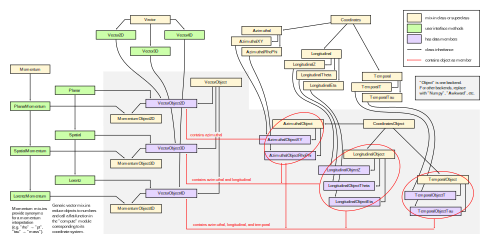

In [14]:
from IPython.display import SVG, display

display(SVG("./inheritance.svg"))

# better here - https://github.com/scikit-hep/vector/blob/main/docs/api/inheritance.svg

### Methods and properties

`Vector` comes loaded with numerous methods and properties which are flowed down using inheritance or are directly defined in the child class.

- `x`, `y`, `z`, `t`, `rho`, `phi`, ...

- `add`, `subtract`, `cross`, `dot`, `equal`, ...

- `to_xyz`, `to_xyzt`, `to_rhophithetatau`, ..., `to_Vector2D` `to_Vector3D`, ...

- `azimuthal`, `longitudinal`, `temporal`

- `costheta`, `cottheta`

- `deltaangle`, `deltaphi`, `deltaeta`, `deltaR`, `deltaR2`

-  ...

A great way to go through these methods and properties is to press TAB!

An even greater way is to go through the documentation!

A complete list of vector properties and methods is available here - https://github.com/scikit-hep/vector#vector-properties 

In [15]:
vec3D = vector.obj(x=1., y=3., z=3.)

In [ ]:
vec3D.

Let's say we want to gather the azimuthal coordinates. We will start by obtaining the `Azimuthal` object -

In [16]:
vec3D.azimuthal

AzimuthalObjectXY(x=1.0, y=3.0)

Next, let's quickly go through the docs of `AzimuthalObjectXY.

In [17]:
?vector.backends.object.AzimuthalObjectXY

Now we know that we can use the `elements` property to access the coordinates!

In [18]:
vec3D.azimuthal.elements

(1.0, 3.0)

## NumPy vectors

`Vector` provides `vector.VectorNumpyXD` classes and `vector.array`constructor to construct `NumPy` vectors. The `VectorNumpyXD` classes are subclasses of `NumPy` array; hence they behave a lot like a structured `NumPy` array.

Currently, vector only accepts structured `NumPy` arrays to construct vectors. These `NumPy` dtype of structured arrays is `object`, which are not as fast as the conventional `NumPy` arrays. 

In [19]:
vector.array(
    [(1., 2.), (3., 4.), (5., 6.), (7., 8.), (9., 10.)],
    dtype=[("x", float), ("y", float)],
)

VectorNumpy2D([(1.,  2.), (3.,  4.), (5.,  6.), (7.,  8.), (9., 10.)],
              dtype=[('x', '<f8'), ('y', '<f8')])

In [20]:
vector.VectorNumpy2D(
    [(1.1, 2.1), (1.2, 2.2), (1.3, 2.3), (1.4, 2.4), (1.5, 2.5)],
    dtype=[("rho", float), ("phi", float)],
)

VectorNumpy2D([(1.1, 2.1), (1.2, 2.2), (1.3, 2.3), (1.4, 2.4), (1.5, 2.5)],
              dtype=[('rho', '<f8'), ('phi', '<f8')])

One can also pass `pandas` like columns to vector constructors.

In [21]:
vector.array({"x": [1.1, 1.2, 1.3, 1.4, 1.5], "y": [2.1, 2.2, 2.3, 2.4, 2.5]})

VectorNumpy2D([(1.1, 2.1), (1.2, 2.2), (1.3, 2.3), (1.4, 2.4), (1.5, 2.5)],
              dtype=[('x', '<f8'), ('y', '<f8')])

Existing NumPy arrays can be viewed as arrays of vectors, but it needs to be a structured array with recognized field names.

In [22]:
import numpy as np

vec = np.arange(0, 24, 0.1).view(
    [
        ("x", float),
        ("y", float),
        ("z", float),
        ("t", float),
    ]
).view(
    vector.VectorNumpy4D
)

vec

VectorNumpy4D([( 0. ,  0.1,  0.2,  0.3), ( 0.4,  0.5,  0.6,  0.7),
               ( 0.8,  0.9,  1. ,  1.1), ( 1.2,  1.3,  1.4,  1.5),
               ( 1.6,  1.7,  1.8,  1.9), ( 2. ,  2.1,  2.2,  2.3),
               ( 2.4,  2.5,  2.6,  2.7), ( 2.8,  2.9,  3. ,  3.1),
               ( 3.2,  3.3,  3.4,  3.5), ( 3.6,  3.7,  3.8,  3.9),
               ( 4. ,  4.1,  4.2,  4.3), ( 4.4,  4.5,  4.6,  4.7),
               ( 4.8,  4.9,  5. ,  5.1), ( 5.2,  5.3,  5.4,  5.5),
               ( 5.6,  5.7,  5.8,  5.9), ( 6. ,  6.1,  6.2,  6.3),
               ( 6.4,  6.5,  6.6,  6.7), ( 6.8,  6.9,  7. ,  7.1),
               ( 7.2,  7.3,  7.4,  7.5), ( 7.6,  7.7,  7.8,  7.9),
               ( 8. ,  8.1,  8.2,  8.3), ( 8.4,  8.5,  8.6,  8.7),
               ( 8.8,  8.9,  9. ,  9.1), ( 9.2,  9.3,  9.4,  9.5),
               ( 9.6,  9.7,  9.8,  9.9), (10. , 10.1, 10.2, 10.3),
               (10.4, 10.5, 10.6, 10.7), (10.8, 10.9, 11. , 11.1),
               (11.2, 11.3, 11.4, 11.5), (11.6, 11.7, 11.8, 11

Since VectorNumpy2D, VectorNumpy3D, VectorNumpy4D, and their momentum equivalents are NumPy array subclasses, all of the normal NumPy methods and functions work on them.

In [23]:
vec.reshape(6, 5, 2)

VectorNumpy4D([[[( 0. ,  0.1,  0.2,  0.3), ( 0.4,  0.5,  0.6,  0.7)],
                [( 0.8,  0.9,  1. ,  1.1), ( 1.2,  1.3,  1.4,  1.5)],
                [( 1.6,  1.7,  1.8,  1.9), ( 2. ,  2.1,  2.2,  2.3)],
                [( 2.4,  2.5,  2.6,  2.7), ( 2.8,  2.9,  3. ,  3.1)],
                [( 3.2,  3.3,  3.4,  3.5), ( 3.6,  3.7,  3.8,  3.9)]],

               [[( 4. ,  4.1,  4.2,  4.3), ( 4.4,  4.5,  4.6,  4.7)],
                [( 4.8,  4.9,  5. ,  5.1), ( 5.2,  5.3,  5.4,  5.5)],
                [( 5.6,  5.7,  5.8,  5.9), ( 6. ,  6.1,  6.2,  6.3)],
                [( 6.4,  6.5,  6.6,  6.7), ( 6.8,  6.9,  7. ,  7.1)],
                [( 7.2,  7.3,  7.4,  7.5), ( 7.6,  7.7,  7.8,  7.9)]],

               [[( 8. ,  8.1,  8.2,  8.3), ( 8.4,  8.5,  8.6,  8.7)],
                [( 8.8,  8.9,  9. ,  9.1), ( 9.2,  9.3,  9.4,  9.5)],
                [( 9.6,  9.7,  9.8,  9.9), (10. , 10.1, 10.2, 10.3)],
                [(10.4, 10.5, 10.6, 10.7), (10.8, 10.9, 11. , 11.1)],
                

Similarly, momentum vectors can be created by either passing in momentum coordinates or by using the `MomentumNumpyXD` classes.

In [24]:
vector.array({"px": [1, 2, 3, 4], "py": [1.1, 2.2, 3.3, 4.4], "pz": [0.1, 0.2, 0.3, 0.4]})

MomentumNumpy3D([(1., 1.1, 0.1), (2., 2.2, 0.2), (3., 3.3, 0.3), (4., 4.4, 0.4)],
                dtype=[('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [25]:
vector.MomentumNumpy2D(
    [(1.1, 2.1), (1.2, 2.2), (1.3, 2.3), (1.4, 2.4), (1.5, 2.5)],
    dtype=[("px", float), ("py", float)],
)

MomentumNumpy2D([(1.1, 2.1), (1.2, 2.2), (1.3, 2.3), (1.4, 2.4), (1.5, 2.5)],
                dtype=[('x', '<f8'), ('y', '<f8')])

## Awkward vectors

Similar to the `NumPy` backend, `Vector` provides `vector.VectorArrayXD` classes and `vector.Array`constructor to construct `Awkward` vectors. The `VectorArayXD` classes are subclasses of `Awkward` array.

Additionally, `vector` also provides the `vector.zip` constructor which acts similar to `awkward.zip`.

In [26]:
vec = vector.awk(
    [
        [{"x": 1, "y": 1.1, "z": 0.1}, {"x": 2, "y": 2.2, "z": 0.2}],
        [],
        [{"x": 3, "y": 3.3, "z": 0.3}],
    ]
)

vec

<VectorArray3D [[{x: 1, y: 1.1, z: 0.1, ... z: 0.3}]] type='3 * var * Vector3D["...'>

In [27]:
vec = vector.zip({"x": [1, 2 ,3], "y": [1, 2, 3], "z": [1, 2, 3]})

vec

<VectorArray3D [{x: 1, y: 1, z: 1}, ... y: 3, z: 3}] type='3 * Vector3D["x": int...'>

Similar to `NumPy` and `Object` vectors, `Awkward` vectors can also access the vector properties.

Note: An array of vectors returns an array of coordinates, and an awkward vector returns an awkward array of coordinates.

In [28]:
vec.azimuthal

AzimuthalAwkwardXY(<Array [1, 2, 3] type='3 * int64'>, <Array [1, 2, 3] type='3 * int64'>)

In [29]:
vec.x

<Array [1, 2, 3] type='3 * int64'>

If you want any records named `Vector2D`, `Vector3D`, `Vector4D`, `Momentum2D`, `Momentum3D`, or `Momentum4D` to be interpreted as vectors, register the behaviors globally.

In [30]:
import awkward as ak

vector.register_awkward()

ak.Array(
    [
        [{"x": 1, "y": 1.1, "z": 0.1}, {"x": 2, "y": 2.2, "z": 0.2}],
        [],
        [{"x": 3, "y": 3.3, "z": 0.3}],
    ],
    with_name="Vector3D",
)

<VectorArray3D [[{x: 1, y: 1.1, z: 0.1, ... z: 0.3}]] type='3 * var * Vector3D["...'>

Momentum vectors work in the same way!

In [31]:
vector.awk(
    [
        [{"px": 1, "py": 1.1, "pz": 0.1}, {"px": 2, "py": 2.2, "pz": 0.2}],
        [],
        [{"px": 3, "py": 3.3, "pz": 0.3}],
    ]
)

<MomentumArray3D [[{x: 1, y: 1.1, z: 0.1, ... z: 0.3}]] type='3 * var * Momentum...'>

## Compiling vectors with Numba

Vector also comes loaded with `Numba-X` backends. `VectorObject`s and `VectorArray`s are currently compatible with `numba`, and `VectorNumpy` will be supported in the near future.

In [32]:
import numba as nb


@nb.njit
def compute_mass(v1, v2):
    return (v1 + v2).mass


compute_mass(vector.obj(px=1, py=2, pz=3, E=4), vector.obj(px=-1, py=-2, pz=-3, E=4))

8.0

When the two `MomentumObject4D` objects are passed as arguments, Numba recognizes them and replaces the Python objects with low-level structs. When it compiles the function, it recognizes `+` as the 4D `add` function and recognizes `.mass` as the `tau` component of the result.

Although this demonstrates that Numba can manipulate vector objects, there is no performance advantage (and a likely disadvantage) to compiling a calculation on just a few vectors. The advantage comes when many vectors are involved, in arrays.

In [33]:
array = vector.awk(
    [
        [
            dict(
                {x: np.random.normal(0, 1) for x in ("px", "py", "pz")},
                E=np.random.normal(10, 1),
            )
            for inner in range(np.random.poisson(1.5))
        ]
        for outer in range(50)
    ]
)


@nb.njit
def compute_masses(array):
    out = np.empty(len(array), np.float64)
    for i, event in enumerate(array):
        total = vector.obj(px=0.0, py=0.0, pz=0.0, E=0.0)
        for vec in event:
            total = total + vec
        out[i] = total.mass
    return out


compute_masses(array)

array([31.96629865, 10.01713402, 40.34966821,  0.        , 27.77332195,
       34.19030137,  0.        ,  0.        , 20.52217653, 18.47452044,
       19.05422195,  0.        , 24.91385905, 19.82590854, 26.3532322 ,
       18.00935608, 10.3285367 , 32.08139886,  0.        ,  0.        ,
       11.3430805 , 20.68436895, 19.20959258, 50.44331315, 11.0661651 ,
       41.73168971,  9.65525971,  0.        ,  0.        , 19.32032709,
        0.        , 11.08140289, 10.58121216,  7.69586635, 19.70257136,
       27.71489131, 21.14169599, 19.23925561,  0.        ,  8.72497777,
       39.15039326, 18.37489095, 10.40295639,  9.12170595, 21.67487471,
       57.73755435, 22.76541391,  0.        ,  8.56811224, 22.67876765])

## Uproot, Awkward, and Vector

## Recent developments

## Near future development plans

## Stuck somewhere? Reach out!

- If something is not working the way it should, or if you want to request a new feature, create a [new issue](https://github.com/scikit-hep/vector/issues) on GitHub.
- To discuss something related to vector, use the [discussions](https://github.com/scikit-hep/vector/discussions/) tab on GitHub or vector’s gitter ([Scikit-HEP/vector](https://gitter.im/Scikit-HEP/vector)) chat room.
- Have a look at vector's [changelog](https://vector.readthedocs.io/en/latest/#changes-in-vector-s-api) to stay up-to-date!